In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("HR_comma_sep.csv")
dataset.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
print("employ data : "  + str(len(dataset.index)))

employ data : 14999


<AxesSubplot:xlabel='left', ylabel='count'>

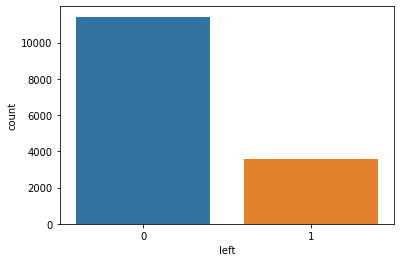

In [4]:
sns.countplot(x="left", data=dataset)

<AxesSubplot:xlabel='left', ylabel='count'>

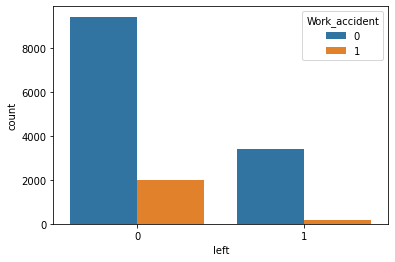

In [5]:
sns.countplot(x="left", hue="Work_accident", data=dataset)

<AxesSubplot:xlabel='left', ylabel='count'>

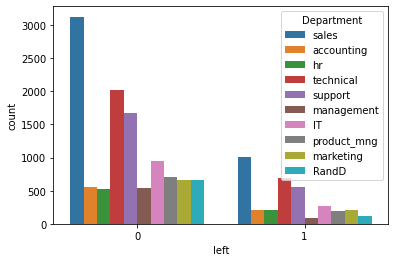

In [6]:
sns.countplot(x="left", hue="Department", data=dataset)

<AxesSubplot:xlabel='left', ylabel='count'>

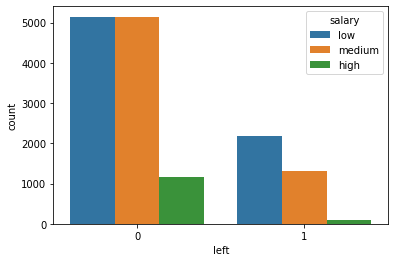

In [7]:
sns.countplot(x="left", hue = "salary", data=dataset)

<AxesSubplot:ylabel='Frequency'>

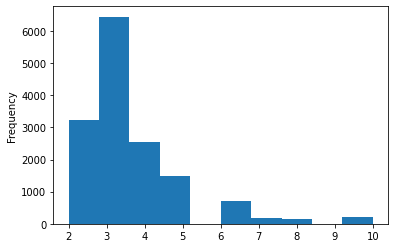

In [8]:
dataset["time_spend_company"].plot.hist()

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
dataset.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [11]:
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [12]:
dataset.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [13]:
deparment = pd.get_dummies(dataset["Department"], drop_first=True)
deparment.head(3)

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0


In [14]:
salary = pd.get_dummies(dataset["salary"],drop_first=True)
salary.head(3)

,low,medium
0,1,0
1,0,1
2,0,1


## Concatenate the dataset (deparment, salary)

In [15]:
dataset = pd.concat([dataset,deparment,salary], axis = 1)
dataset.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1


## Drop The columns

In [16]:
dataset.drop(["Department","salary"],axis=1, inplace=True)
dataset.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1


## Create Dependent and Independent Variable

In [17]:
X = dataset.drop("left", axis=1)
X.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1


In [18]:
y = dataset["left"]
y.head(3)

0    1
1    1
2    1
Name: left, dtype: int64

## Split the data into train and test data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [21]:
X_train.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
13311,0.96,0.85,4,247,3,0,0,0,0,0,0,0,0,1,0,0,0,0
11327,0.59,0.64,5,269,3,0,0,0,0,0,0,0,0,0,1,0,0,1
14879,0.41,0.49,2,147,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [22]:
y_train.head(3)

13311    0
11327    0
14879    1
Name: left, dtype: int64

## Import the model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression(max_iter=1000)

## Train the model

In [25]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Model Accuracy

In [26]:
model.score(X_test,y_test)

0.7764444444444445

In [27]:
predictions=model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [29]:
X_train.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
13311,0.96,0.85,4,247,3,0,0,0,0,0,0,0,0,1,0,0,0,0
11327,0.59,0.64,5,269,3,0,0,0,0,0,0,0,0,0,1,0,0,1
14879,0.41,0.49,2,147,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [31]:
model.predict([[0.86,0.70,3,250,2,0,0,0,0,0,0,0,0,0,0,1,1,0]])

/home/cavid/anaconda3/envs/bangla_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

## Confusion matrix

In [32]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[3138,  255],
       [ 751,  356]])

Text(69.0, 0.5, 'Truth')

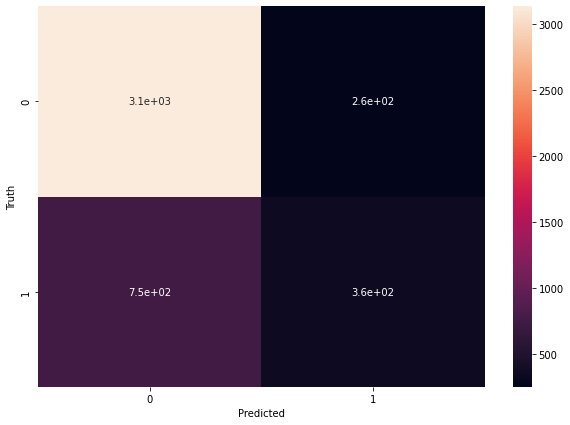

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")